In [1]:
import numpy as np

# Sample Data
data = np.array([[2, 3], [4, 5], [6, 7]])

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Initialize parameters
m, b = 0, 0

# SGD Algorithm
for i in range(num_iterations):
    # Randomly select a data point
    idx = np.random.randint(0, len(data))
    x_i, y_i = data[idx]
    
    # Compute gradients
    grad_m = -(y_i - (m * x_i + b)) * x_i
    grad_b = -(y_i - (m * x_i + b))
    
    # Update parameters
    m -= learning_rate * grad_m
    b -= learning_rate * grad_b

    # Print the parameters for every 100th iteration
    if i % 100 == 0:
        print(f"Iteration {i}: m = {m}, b = {b}")

# Output the final parameters
print(f"Final parameters: m = {m}, b = {b}")


Iteration 0: m = 0.2, b = 0.05
Iteration 100: m = 1.1383019796620668, b = 0.3380232015436208
Iteration 200: m = 1.1200757852822363, b = 0.4242066960736916
Iteration 300: m = 1.096585862820871, b = 0.5034603058369439
Iteration 400: m = 1.084943317008886, b = 0.5614580347327872
Iteration 500: m = 1.085415749004031, b = 0.618405374724236
Iteration 600: m = 1.0699621647200384, b = 0.674209970477382
Iteration 700: m = 1.0609410535908654, b = 0.7168258264432612
Iteration 800: m = 1.0531743955338662, b = 0.7514954141904496
Iteration 900: m = 1.0489675593896524, b = 0.785784963174077
Final parameters: m = 1.0457495382119677, b = 0.8130867940344559


### Explanation of Gradient Descent Variants:

1. **Batch Gradient Descent**:
    - **Definition**: Computes the gradient using the entire dataset.
    - **Update Rule**: Parameters are updated once per epoch using the average gradient of the whole dataset.
    - **Pros**: Stable updates, accurate gradient.
    - **Cons**: Computationally expensive, high memory usage.

2. **Stochastic Gradient Descent (SGD)**:
    - **Definition**: Computes the gradient using a single data point.
    - **Update Rule**: Parameters are updated for each training example.
    - **Pros**: Fast updates, low memory usage, can escape local minima.
    - **Cons**: Noisy updates, high variance.

3. **Mini-Batch Gradient Descent**:
    - **Definition**: Computes the gradient using a small subset (mini-batch) of the dataset.
    - **Update Rule**: Parameters are updated multiple times per epoch.
    - **Pros**: Balance between batch gradient descent and SGD, more efficient, and less noisy than SGD.
    - **Cons**: Requires tuning of mini-batch size, intermediate memory usage.

Each variant has its own trade-offs, and the choice depends on the specific problem, dataset size, and available computational resources.

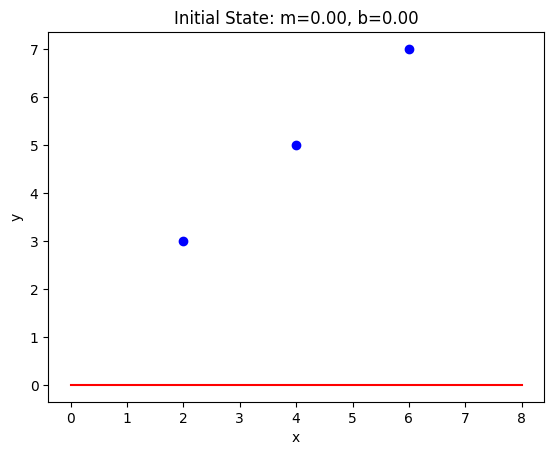

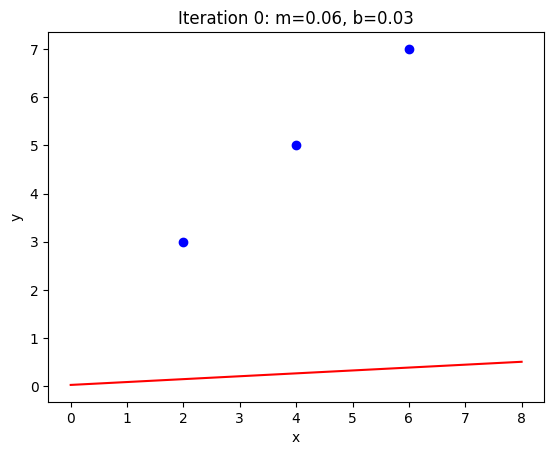

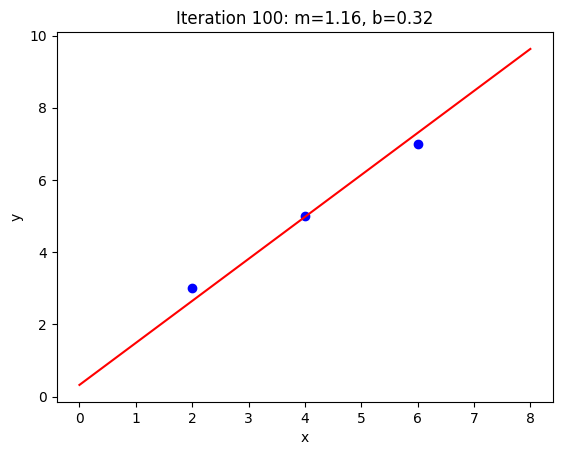

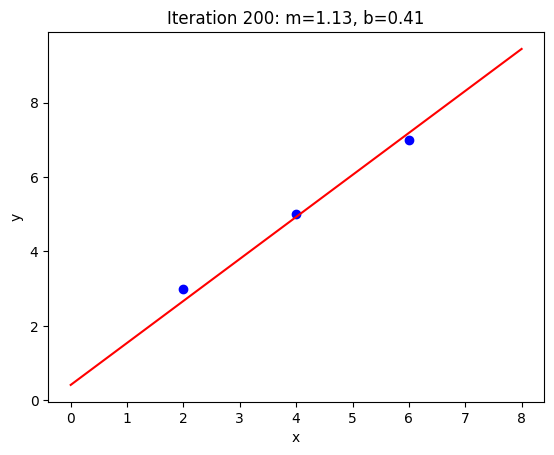

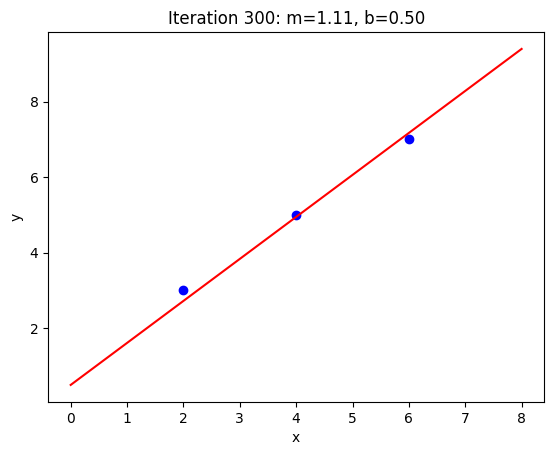

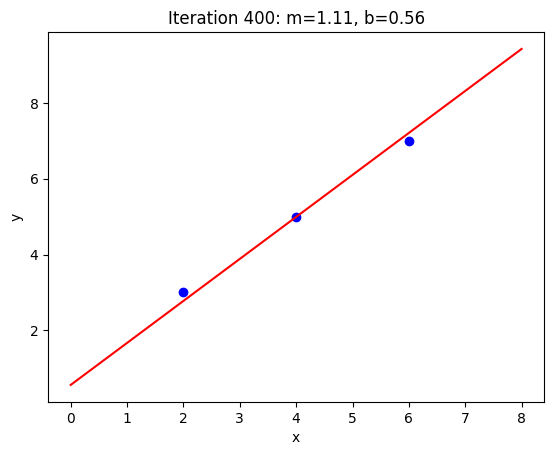

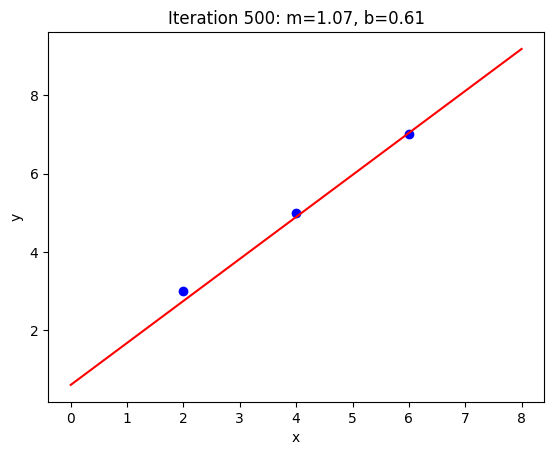

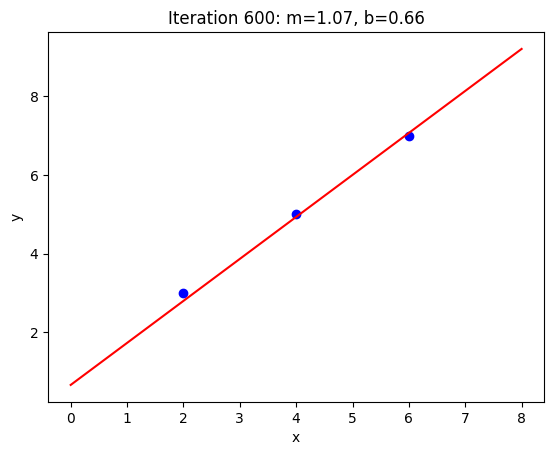

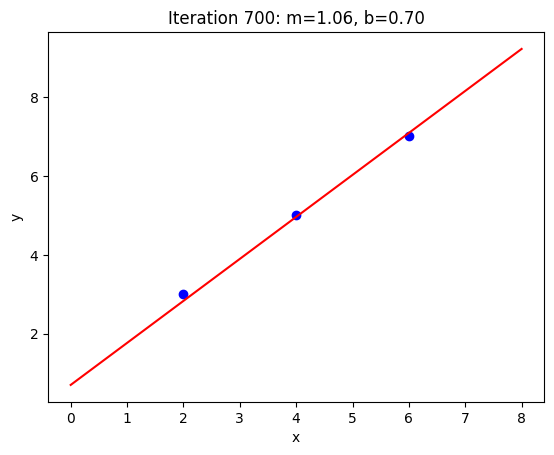

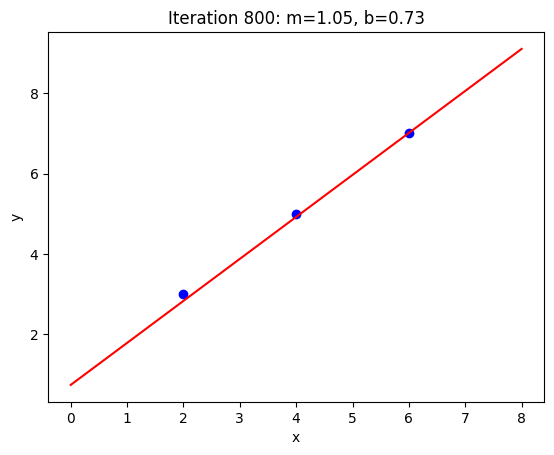

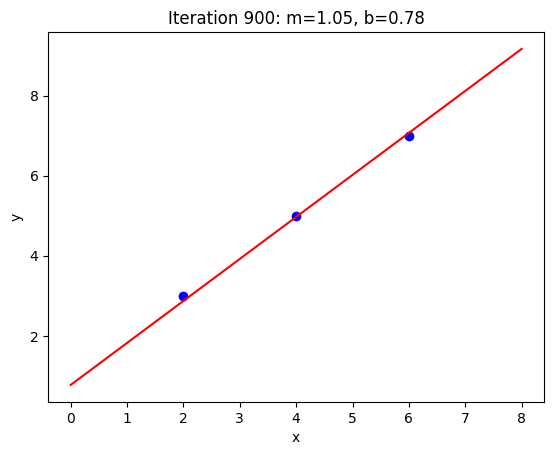

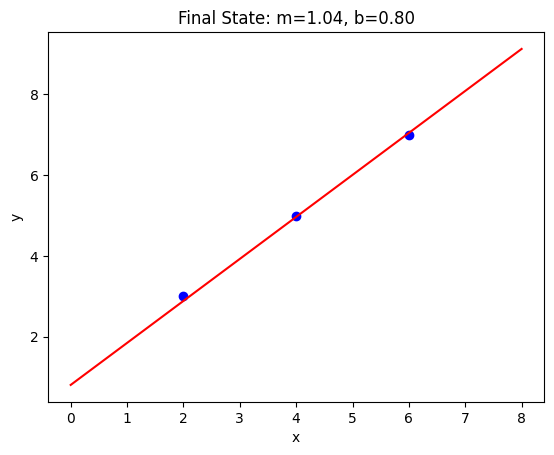

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample Data
data = np.array([[2, 3], [4, 5], [6, 7]])

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Initialize parameters
m, b = 0, 0

# Function to plot data and the fitted line
def plot_regression(m, b, data, title):
    plt.scatter(data[:, 0], data[:, 1], color='blue')
    x_vals = np.linspace(0, 8, 100)
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

# Initial plot
plot_regression(m, b, data, f'Initial State: m={m:.2f}, b={b:.2f}')

# SGD Algorithm
for i in range(num_iterations):
    # Randomly select a data point
    idx = np.random.randint(0, len(data))
    x_i, y_i = data[idx]
    
    # Compute gradients
    grad_m = -(y_i - (m * x_i + b)) * x_i
    grad_b = -(y_i - (m * x_i + b))
    
    # Update parameters
    m -= learning_rate * grad_m
    b -= learning_rate * grad_b

    # Plot the regression line at specific iterations
    if i % 100 == 0:
        plot_regression(m, b, data, f'Iteration {i}: m={m:.2f}, b={b:.2f}')

# Final plot
plot_regression(m, b, data, f'Final State: m={m:.2f}, b={b:.2f}')


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image
import os

# Define a simple quadratic cost function
def cost_function(x):
    return x**2

# Gradient of the cost function
def gradient(x):
    return 2*x

# SGD algorithm
def sgd(initial_x, learning_rate, num_iterations):
    x = initial_x
    history = [x]
    for _ in range(num_iterations):
        grad = gradient(x)
        x -= learning_rate * grad
        history.append(x)
    return history

# Create a function to plot and save frames
def plot_frame(x_history, filename):
    plt.figure(figsize=(8, 6))
    x_range = np.linspace(-10, 10, 400)
    plt.plot(x_range, cost_function(x_range), 'b-', label='Cost function')
    plt.scatter(x_history, [cost_function(x) for x in x_history], c='r', label='SGD Path')
    plt.title('SGD Convergence')
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(0, 100)
    plt.savefig(filename)
    plt.close()

# Parameters
initial_x = 8
learning_rate = 0.1
num_iterations = 100

# Directory to store frames
frames_dir = 'frames'
os.makedirs(frames_dir, exist_ok=True)

# Generate frames for the GIF
x_history = sgd(initial_x, learning_rate, num_iterations)
for i in range(len(x_history)):
    plot_frame(x_history[:i+1], f'{frames_dir}/frame_{i:03d}.png')

# Create a GIF
frames = [Image.open(f'{frames_dir}/frame_{i:03d}.png') for i in range(len(x_history))]
gif_path = 'sgd_limitations.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved to {gif_path}")

GIF saved to sgd_limitations.gif


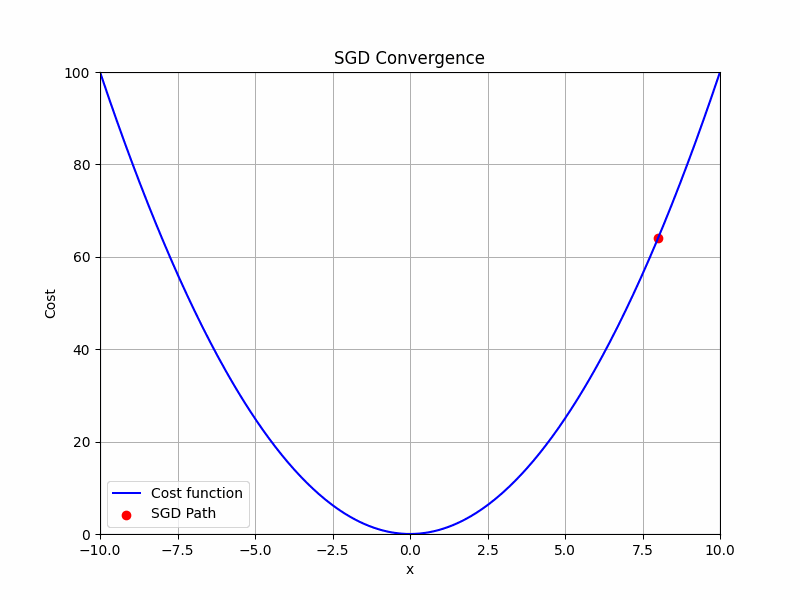

# Momentum

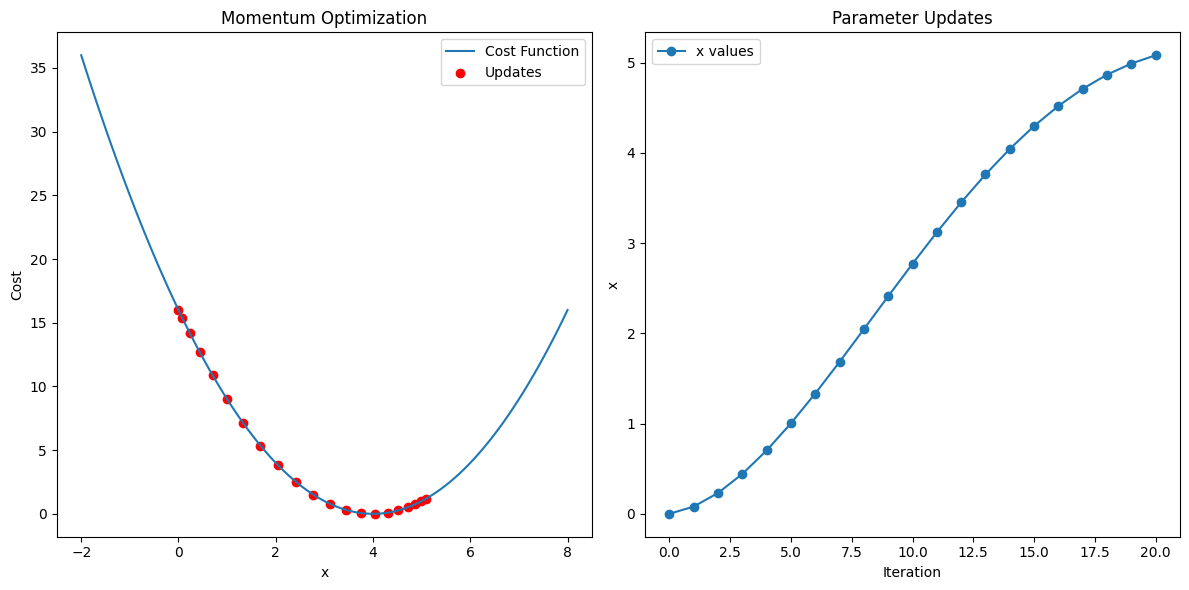

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def cost_function(x):
    return (x - 4)**2

# Gradient of the objective function
def gradient(x):
    return 2 * (x - 4)

# Parameters
alpha = 0.1  # Learning rate
beta = 0.9   # Momentum coefficient
iterations = 20

# Initialization
x = 0
V = 0
history_x = [x]
history_cost = [cost_function(x)]

# Optimization with Momentum
for i in range(iterations):
    grad = gradient(x)
    V = beta * V - (1 - beta) * grad
    x = x + alpha * V
    history_x.append(x)
    history_cost.append(cost_function(x))

# Plotting
plt.figure(figsize=(12, 6))

# Cost function plot
plt.subplot(1, 2, 1)
x_vals = np.linspace(-2, 8, 100)
y_vals = cost_function(x_vals)
plt.plot(x_vals, y_vals, label='Cost Function')
plt.scatter(history_x, history_cost, color='red', label='Updates')
plt.xlabel('x')
plt.ylabel('Cost')
plt.title('Momentum Optimization')
plt.legend()

# Parameter update plot
plt.subplot(1, 2, 2)
plt.plot(range(iterations + 1), history_x, marker='o', label='x values')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Parameter Updates')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image
import os

# Define a simple quadratic cost function
def cost_function(x):
    return x**2

# Gradient of the cost function
def gradient(x):
    return 2*x

# Momentum Gradient Descent algorithm
def momentum_gradient_descent(initial_x, learning_rate, num_iterations, momentum):
    x = initial_x
    velocity = 0
    history = [x]
    for _ in range(num_iterations):
        grad = gradient(x)
        velocity = momentum * velocity - (1-momentum) * grad
        x = x + learning_rate * velocity
        history.append(x)
    return history

# Create a function to plot and save frames
def plot_frame(x_history, filename, title):
    plt.figure(figsize=(8, 6))
    x_range = np.linspace(-10, 10, 400)
    plt.plot(x_range, cost_function(x_range), 'b-', label='Cost function')
    plt.scatter(x_history, [cost_function(x) for x in x_history], c='r', label='Path')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(0, 100)
    plt.savefig(filename)
    plt.close()

# Parameters
initial_x = 8
learning_rate = 0.1
num_iterations = 100
momentum = 0.9

# Directory to store frames
frames_dir = 'frames_momentum'
os.makedirs(frames_dir, exist_ok=True)

# Generate frames for the GIF
x_history = momentum_gradient_descent(initial_x, learning_rate, num_iterations, momentum)
for i in range(len(x_history)):
    plot_frame(x_history[:i+1], f'{frames_dir}/frame_{i:03d}.png', 'Momentum Gradient Descent Convergence')

# Create a GIF
frames = [Image.open(f'{frames_dir}/frame_{i:03d}.png') for i in range(len(x_history))]
gif_path = 'momentum_gradient_descent.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved to {gif_path}")

GIF saved to momentum_gradient_descent.gif


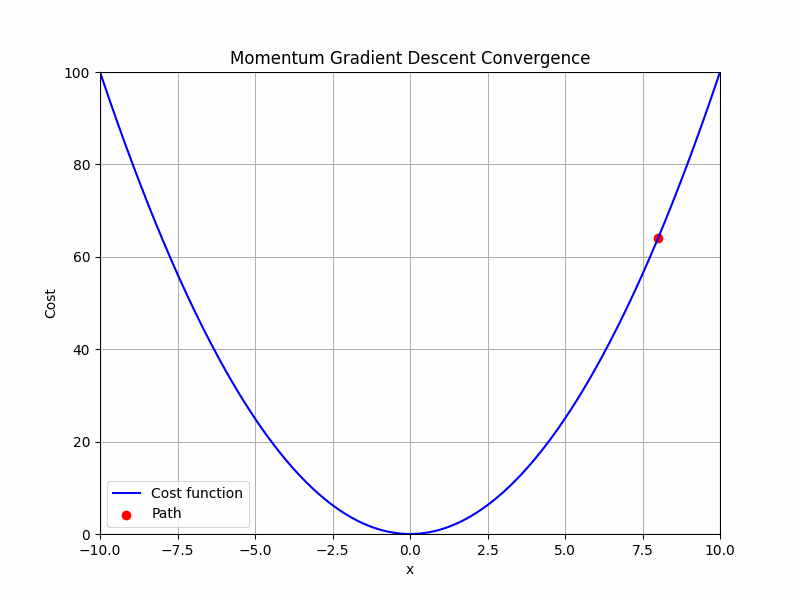

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image
import os

# Define a simple quadratic cost function
def cost_function(x):
    return x**2

# Gradient of the cost function
def gradient(x):
    return 2*x

# Momentum Gradient Descent algorithm
def momentum_gradient_descent(initial_x, learning_rate, num_iterations, momentum):
    x = initial_x
    velocity = 0
    history = [x]
    for _ in range(num_iterations):
        grad = gradient(x)
        velocity = momentum * velocity - (1-momentum) * grad
        x = x + learning_rate * velocity
        history.append(x)
    return history

# Create a function to plot and save frames
def plot_frame(x_history, filename, title):
    plt.figure(figsize=(8, 6))
    x_range = np.linspace(-10, 10, 400)
    plt.plot(x_range, cost_function(x_range), 'b-', label='Cost function')
    plt.scatter(x_history, [cost_function(x) for x in x_history], c='r', label='Path')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(0, 100)
    plt.savefig(filename)
    plt.close()

# Parameters
initial_x = 8
learning_rate = 0.1
num_iterations = 100
momentum = 0.9

# Directory to store frames
frames_dir = 'frames_momentum'
os.makedirs(frames_dir, exist_ok=True)

# Generate frames for the GIF
x_history = momentum_gradient_descent(initial_x, learning_rate, num_iterations, momentum)
for i in range(len(x_history)):
    plot_frame(x_history[:i+1], f'{frames_dir}/frame_{i:03d}.png', 'Momentum Gradient Descent Convergence')

# Create a GIF
frames = [Image.open(f'{frames_dir}/frame_{i:03d}.png') for i in range(len(x_history))]
gif_path = 'momentum_gradient_descent.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved to {gif_path}")

GIF saved to momentum_gradient_descent.gif


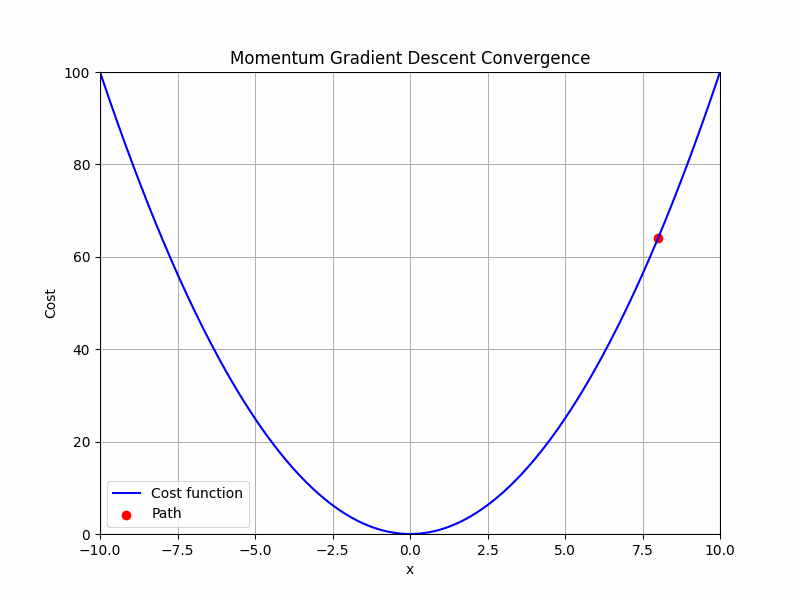

# NAG

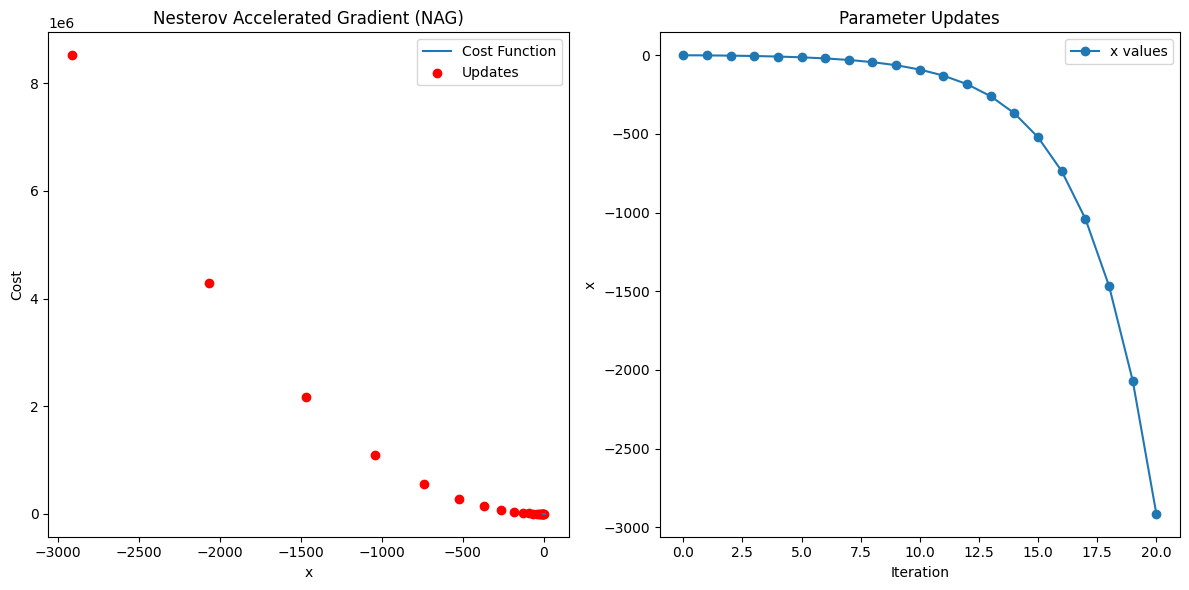

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def cost_function(x):
    return (x - 4)**2

# Gradient of the objective function
def gradient(x):
    return 2 * (x - 4)

# Parameters
alpha = 0.1  # Learning rate
beta = 0.9   # Momentum coefficient
iterations = 20

# Initialization
x = 0
V = 0
history_x = [x]
history_cost = [cost_function(x)]

# Optimization with NAG
for i in range(iterations):
    # Lookahead point
    lookahead_x = x - beta * V
    grad = gradient(lookahead_x)
    V = beta * V + (1-beta) * grad
    x = x + V
    history_x.append(x)
    history_cost.append(cost_function(x))

# Plotting
plt.figure(figsize=(12, 6))

# Cost function plot
plt.subplot(1, 2, 1)
x_vals = np.linspace(-2, 8, 100)
y_vals = cost_function(x_vals)
plt.plot(x_vals, y_vals, label='Cost Function')
plt.scatter(history_x, history_cost, color='red', label='Updates')
plt.xlabel('x')
plt.ylabel('Cost')
plt.title('Nesterov Accelerated Gradient (NAG)')
plt.legend()

# Parameter update plot
plt.subplot(1, 2, 2)
plt.plot(range(iterations + 1), history_x, marker='o', label='x values')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.title('Parameter Updates')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image
import os

# Define a simple quadratic cost function
def cost_function(x):
    return x**2

# Gradient of the cost function
def gradient(x):
    return 2*x

# Nesterov Accelerated Gradient algorithm
def nesterov_accelerated_gradient(initial_x, learning_rate, num_iterations, momentum):
    x = initial_x
    velocity = 0
    history = [x]
    for _ in range(num_iterations):
        prev_velocity = velocity
        velocity = momentum * velocity - learning_rate * gradient(x + momentum * prev_velocity)
        x = x + velocity
        history.append(x)
    return history

# Create a function to plot and save frames
def plot_frame(x_history, filename, title):
    plt.figure(figsize=(8, 6))
    x_range = np.linspace(-10, 10, 400)
    plt.plot(x_range, cost_function(x_range), 'b-', label='Cost function')
    plt.scatter(x_history, [cost_function(x) for x in x_history], c='r', label='NAG Path')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(0, 100)
    plt.savefig(filename)
    plt.close()

# Parameters
initial_x = 8
learning_rate = 0.1
num_iterations = 100
momentum = 0.9

# Directory to store frames
frames_dir = 'frames_nesterov'
os.makedirs(frames_dir, exist_ok=True)

# Generate frames for the GIF
x_history = nesterov_accelerated_gradient(initial_x, learning_rate, num_iterations, momentum)
for i in range(len(x_history)):
    plot_frame(x_history[:i+1], f'{frames_dir}/frame_{i:03d}.png', 'Nesterov Accelerated Gradient Descent Convergence')

# Create a GIF
frames = [Image.open(f'{frames_dir}/frame_{i:03d}.png') for i in range(len(x_history))]
gif_path = 'nesterov_accelerated_gradient_descent.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved to {gif_path}")


GIF saved to nesterov_accelerated_gradient_descent.gif


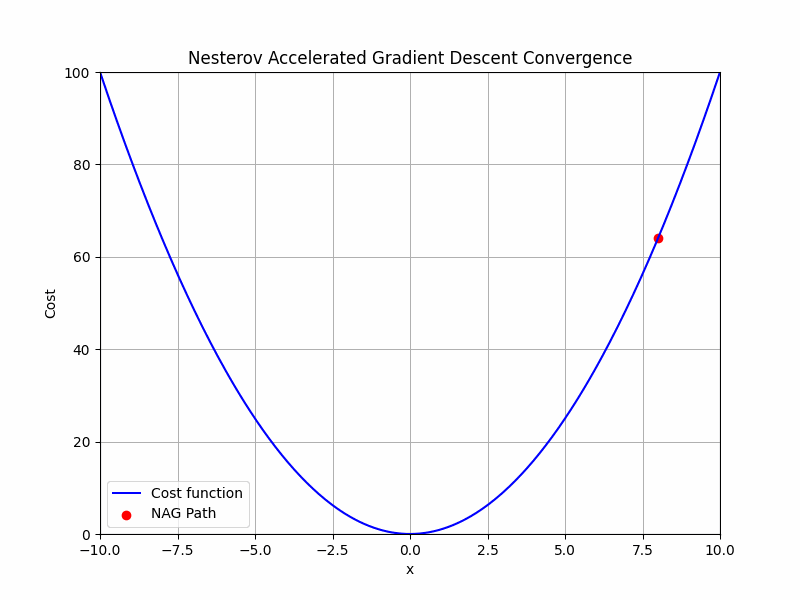

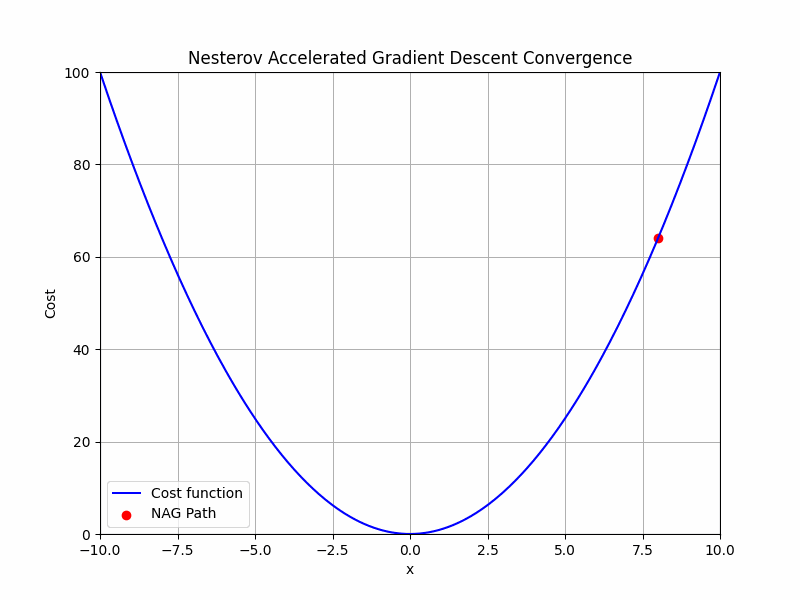

# AdaGrad

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image
import os

# Define a simple quadratic cost function
def cost_function(x):
    return x**2

# Gradient of the cost function
def gradient(x):
    return 2*x

# Adagrad algorithm
def adagrad(initial_x, learning_rate, num_iterations, epsilon=1e-8):
    x = initial_x
    accumulated_squared_grad = 0
    history = [x]
    for _ in range(num_iterations):
        grad = gradient(x)
        accumulated_squared_grad += grad**2
        adjusted_learning_rate = learning_rate / (np.sqrt(accumulated_squared_grad) + epsilon)
        x -= adjusted_learning_rate * grad
        history.append(x)
    return history

# Create a function to plot and save frames
def plot_frame(x_history, filename, title):
    plt.figure(figsize=(8, 6))
    x_range = np.linspace(-10, 10, 400)
    plt.plot(x_range, cost_function(x_range), 'b-', label='Cost function')
    plt.scatter(x_history, [cost_function(x) for x in x_history], c='r', label='Adagrad Path')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(0, 100)
    plt.savefig(filename)
    plt.close()

# Parameters
initial_x = 8
learning_rate = 1.0
num_iterations = 100

# Directory to store frames
frames_dir = 'frames_adagrad'
os.makedirs(frames_dir, exist_ok=True)

# Generate frames for the GIF
x_history = adagrad(initial_x, learning_rate, num_iterations)
for i in range(len(x_history)):
    plot_frame(x_history[:i+1], f'{frames_dir}/frame_{i:03d}.png', 'Adagrad Convergence')

# Create a GIF
frames = [Image.open(f'{frames_dir}/frame_{i:03d}.png') for i in range(len(x_history))]
gif_path = 'adagrad_convergence.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved to {gif_path}")


GIF saved to adagrad_convergence.gif


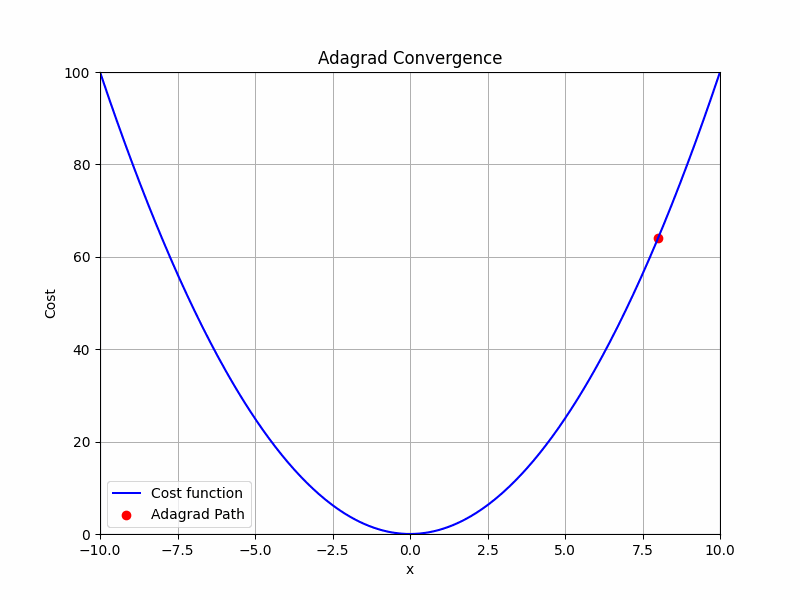

Exponential Moving Average (EMA) is a type of moving average that places a greater weight and significance on the most recent data points. The EMA is designed to respond more quickly to recent changes in the data compared to a simple moving average (SMA), which assigns equal weight to all data points in the period. EMAs are commonly used in finance, particularly in technical analysis, to smooth out price data and identify trends more effectively.

Formula
The formula for the EMA is:

EMA
𝑡
=
𝛼
⋅
𝑥
𝑡
+
(
1
−
𝛼
)
⋅
EMA
𝑡
−
1
EMA 
t
​
 =α⋅x 
t
​
 +(1−α)⋅EMA 
t−1
​
 

Where:

EMA
𝑡
EMA 
t
​
  is the EMA at time 
𝑡
t
𝑥
𝑡
x 
t
​
  is the value at time 
𝑡
t
𝛼
α is the smoothing factor, calculated as 
𝛼
=
2
𝑁
+
1
α= 
N+1
2
​
 , where 
𝑁
N is the number of periods
Key Characteristics
Weighted Average: EMA gives more weight to recent prices, making it more responsive to new information.
Smoothing: It helps to smooth out data to identify trends more clearly.
Lag: While EMAs respond more quickly to changes than SMAs, they still have some lag due to the averaging process.

# EMA

[ 1.76405235  2.16420955  3.14294754  5.38384074  7.25139873  6.27412085
  7.22420927  7.07285206  6.96963321  7.38023171  7.52427528  8.97854879
  9.73958651  9.86126153 10.30512476 10.63879909 12.13287816 11.9277199
 12.2407876  11.38669186  8.83370204  9.48732064 10.35175684  9.60959182
 11.87934644 10.42498077 10.47073928 10.28355543 11.81633465 13.28569342
 13.44064084 13.81880336 12.93101762 10.95022115 10.602309   10.75865797
 11.98894865 13.1913285  12.80400168 12.50169893 11.45314596 10.03312803
  8.32685784 10.27763323  9.76798105  9.32990675  8.07711139  8.85460174
  7.2407039   7.02796362  6.13249705  6.51939955  6.00859441  4.82796223
  4.79978     5.22811187  5.2946291   5.59710099  4.9627789   4.60003773
  3.92757729  3.56802412  2.75487784  1.02859524  1.20602138  0.80424045
 -0.8259579  -0.36317565 -1.27047401 -1.21852861 -0.48943805 -0.36045514
  0.77894554 -0.45588028 -0.05353864 -0.73834873 -1.60914588 -2.18799554
 -2.49954807 -2.44338273 -3.60853257 -2.70770608 -2.

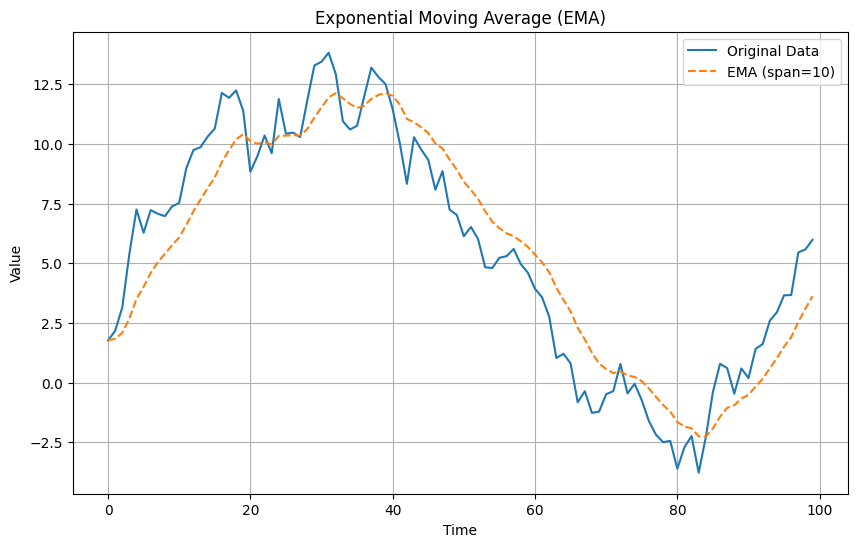

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
time_series_data = np.cumsum(np.random.randn(100))  # Cumulative sum to simulate a trend
print(time_series_data)

# Calculate EMA
def calculate_ema(data, span):
    return data.ewm(span=span, adjust=False).mean()

# Parameters
span = 10  # Number of periods for EMA

# Calculate EMA
ema = calculate_ema(pd.Series(time_series_data), span)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(ema, label=f'EMA (span={span})', linestyle='--')
plt.title('Exponential Moving Average (EMA)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


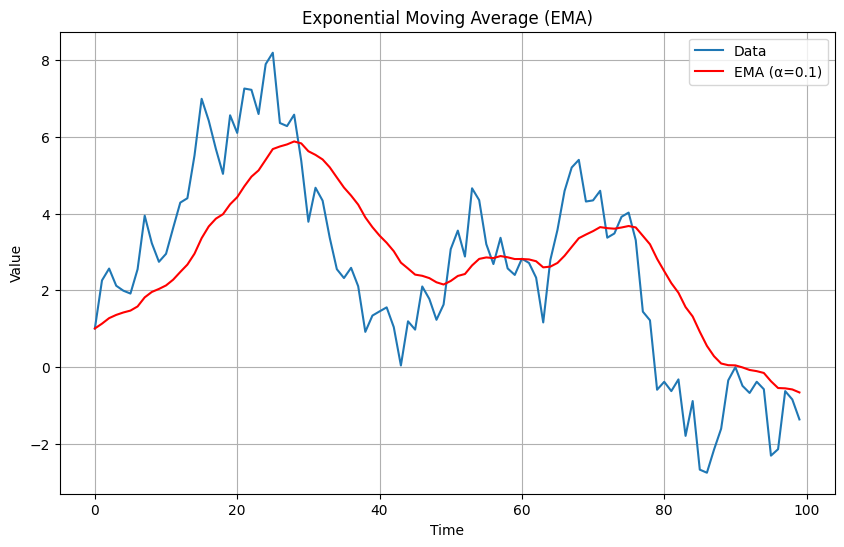

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate EMA
def calculate_ema(data, alpha):
    ema = [data[0]]  # Start with the first data point
    for t in range(1, len(data)):
        ema_value = alpha * data[t] + (1 - alpha) * ema[t - 1]
        ema.append(ema_value)
    return ema

# Sample data
data = np.random.randn(100).cumsum()  # Generate random walk data

# Parameters
alpha = 0.1  # Smoothing factor

# Calculate EMA
ema_values = calculate_ema(data, alpha)

# Plot the data and EMA
plt.figure(figsize=(10, 6))
plt.plot(data, label='Data')
plt.plot(ema_values, label=f'EMA (α={alpha})', color='red')
plt.title('Exponential Moving Average (EMA)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


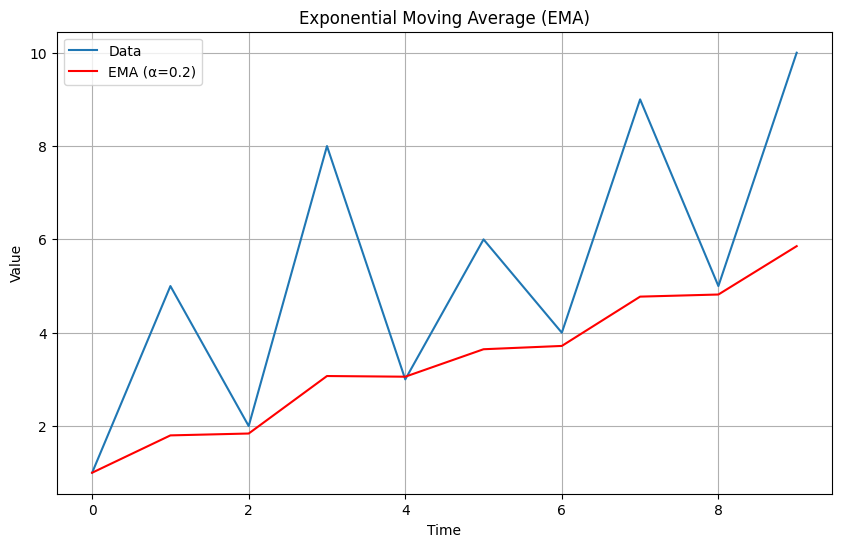

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Example time series data
data = [1, 5, 2, 8, 3, 6, 4, 9, 5, 10]

# Function to calculate EMA
def calculate_ema(data, alpha):
    ema = [data[0]]  # Start with the first data point
    for t in range(1, len(data)):
        ema_value = alpha * data[t] + (1 - alpha) * ema[t - 1]
        ema.append(ema_value)
    return ema

# Parameters
alpha = 0.2  # Smoothing factor

# Calculate EMA
ema_values = calculate_ema(data, alpha)

# Plot the data and EMA
plt.figure(figsize=(10, 6))
plt.plot(data, label='Data')
plt.plot(ema_values, label=f'EMA (α={alpha})', color='red')
plt.title('Exponential Moving Average (EMA)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Adadelta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image
import os

# Define a simple quadratic cost function
def cost_function(x):
    return x**2

# Gradient of the cost function
def gradient(x):
    return 2*x

# Adadelta algorithm
def adadelta(initial_x, learning_rate, num_iterations, decay_rate=0.95, epsilon=1e-8):
    x = initial_x
    accumulated_squared_grad = 0
    accumulated_squared_update = 0
    history = [x]
    for _ in range(num_iterations):
        grad = gradient(x)
        accumulated_squared_grad = decay_rate * accumulated_squared_grad + (1 - decay_rate) * grad**2
        update = - (np.sqrt(accumulated_squared_update + epsilon) / np.sqrt(accumulated_squared_grad + epsilon)) * grad
        accumulated_squared_update = decay_rate * accumulated_squared_update + (1 - decay_rate) * update**2
        x += update
        history.append(x)
    return history

# Create a function to plot and save frames
def plot_frame(x_history, filename, title):
    plt.figure(figsize=(8, 6))
    x_range = np.linspace(-10, 10, 400)
    plt.plot(x_range, cost_function(x_range), 'b-', label='Cost function')
    plt.scatter(x_history, [cost_function(x) for x in x_history], c='r', label='Adadelta Path')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(0, 100)
    plt.savefig(filename)
    plt.close()

# Parameters
initial_x = 8
learning_rate = 1.0  # Adadelta typically does not require an initial learning rate
num_iterations = 100

# Directory to store frames
frames_dir = 'frames_adadelta'
os.makedirs(frames_dir, exist_ok=True)

# Generate frames for the GIF
x_history = adadelta(initial_x, learning_rate, num_iterations)
for i in range(len(x_history)):
    plot_frame(x_history[:i+1], f'{frames_dir}/frame_{i:03d}.png', 'Adadelta Convergence')

# Create a GIF
frames = [Image.open(f'{frames_dir}/frame_{i:03d}.png') for i in range(len(x_history))]
gif_path = 'adadelta_convergence.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved to {gif_path}")


GIF saved to adadelta_convergence.gif


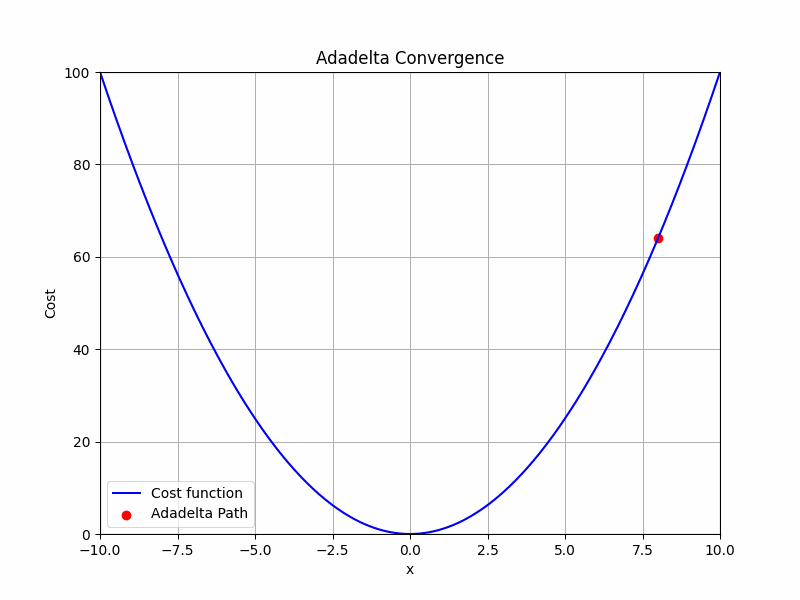

# RMS Prop

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image
import os

# Define a simple quadratic cost function
def cost_function(x):
    return x**2

# Gradient of the cost function
def gradient(x):
    return 2*x

# RMSprop algorithm
def rmsprop(initial_x, learning_rate, num_iterations, decay_rate=0.9, epsilon=1e-8):
    x = initial_x
    accumulated_squared_grad = 0
    history = [x]
    for _ in range(num_iterations):
        grad = gradient(x)
        accumulated_squared_grad = decay_rate * accumulated_squared_grad + (1 - decay_rate) * grad**2
        adjusted_learning_rate = learning_rate / (np.sqrt(accumulated_squared_grad) + epsilon)
        x -= adjusted_learning_rate * grad
        history.append(x)
    return history

# Create a function to plot and save frames
def plot_frame(x_history, filename, title):
    plt.figure(figsize=(8, 6))
    x_range = np.linspace(-10, 10, 400)
    plt.plot(x_range, cost_function(x_range), 'b-', label='Cost function')
    plt.scatter(x_history, [cost_function(x) for x in x_history], c='r', label='RMSprop Path')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(0, 100)
    plt.savefig(filename)
    plt.close()

# Parameters
initial_x = 8
learning_rate = 0.1
num_iterations = 100

# Directory to store frames
frames_dir = 'frames_rmsprop'
os.makedirs(frames_dir, exist_ok=True)

# Generate frames for the GIF
x_history = rmsprop(initial_x, learning_rate, num_iterations)
for i in range(len(x_history)):
    plot_frame(x_history[:i+1], f'{frames_dir}/frame_{i:03d}.png', 'RMSprop Convergence')

# Create a GIF
frames = [Image.open(f'{frames_dir}/frame_{i:03d}.png') for i in range(len(x_history))]
gif_path = 'rmsprop_convergence.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved to {gif_path}")


GIF saved to rmsprop_convergence.gif


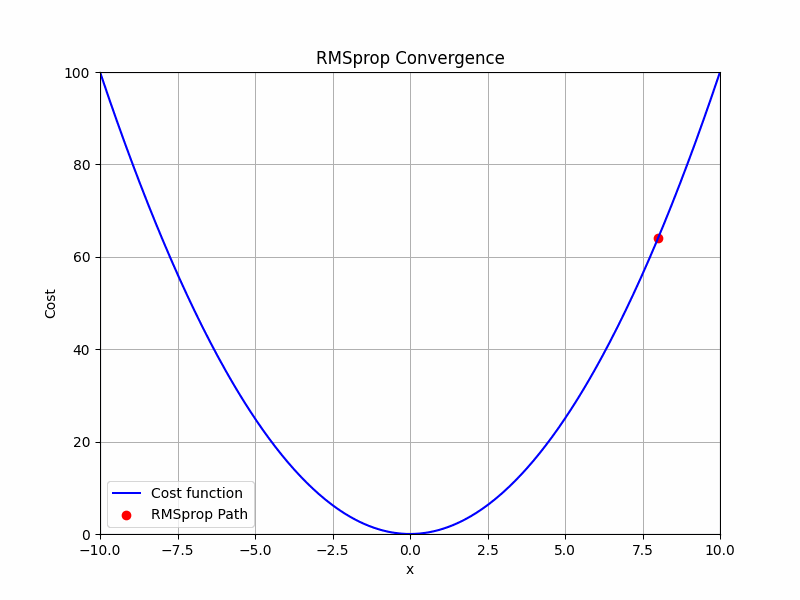

# Adam

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from PIL import Image
import os

# Define a simple quadratic cost function
def cost_function(x):
    return x**2

# Gradient of the cost function
def gradient(x):
    return 2*x

# Adam algorithm
def adam(initial_x, learning_rate, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = initial_x
    m = 0
    v = 0
    history = [x]
    for t in range(1, num_iterations + 1):
        grad = gradient(x)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        history.append(x)
    return history

# Create a function to plot and save frames
def plot_frame(x_history, filename, title):
    plt.figure(figsize=(8, 6))
    x_range = np.linspace(-10, 10, 400)
    plt.plot(x_range, cost_function(x_range), 'b-', label='Cost function')
    plt.scatter(x_history, [cost_function(x) for x in x_history], c='r', label='Adam Path')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.xlim(-10, 10)
    plt.ylim(0, 100)
    plt.savefig(filename)
    plt.close()

# Parameters
initial_x = 8
learning_rate = 0.1
num_iterations = 100

# Directory to store frames
frames_dir = 'frames_adam'
os.makedirs(frames_dir, exist_ok=True)

# Generate frames for the GIF
x_history = adam(initial_x, learning_rate, num_iterations)
for i in range(len(x_history)):
    plot_frame(x_history[:i+1], f'{frames_dir}/frame_{i:03d}.png', 'Adam Convergence')

# Create a GIF
frames = [Image.open(f'{frames_dir}/frame_{i:03d}.png') for i in range(len(x_history))]
gif_path = 'adam_convergence.gif'
frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=100, loop=0)

print(f"GIF saved to {gif_path}")


GIF saved to adam_convergence.gif


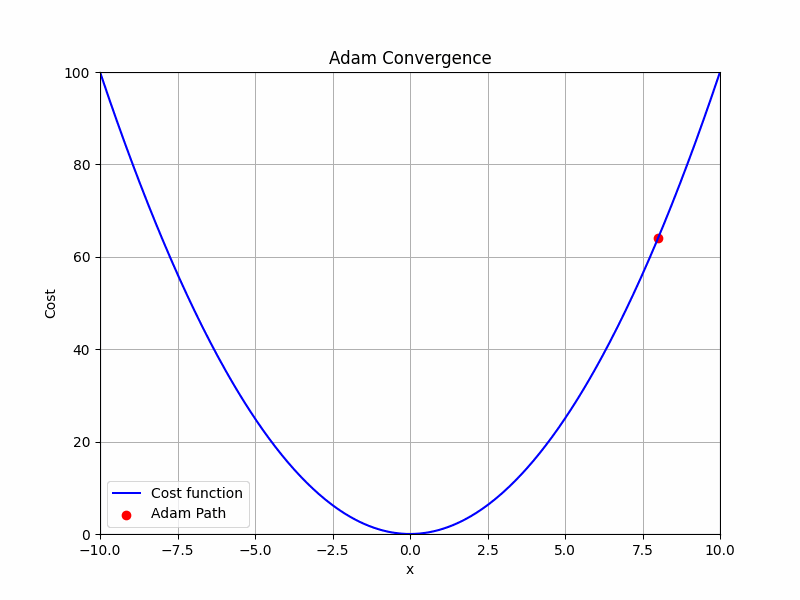

d:\pythonnn\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training with SGD optimizer...
Training with Momentum optimizer...
Training with Nesterov optimizer...
Training with Adagrad optimizer...
Training with Adadelta optimizer...
Training with RMSprop optimizer...
Training with Adam optimizer...


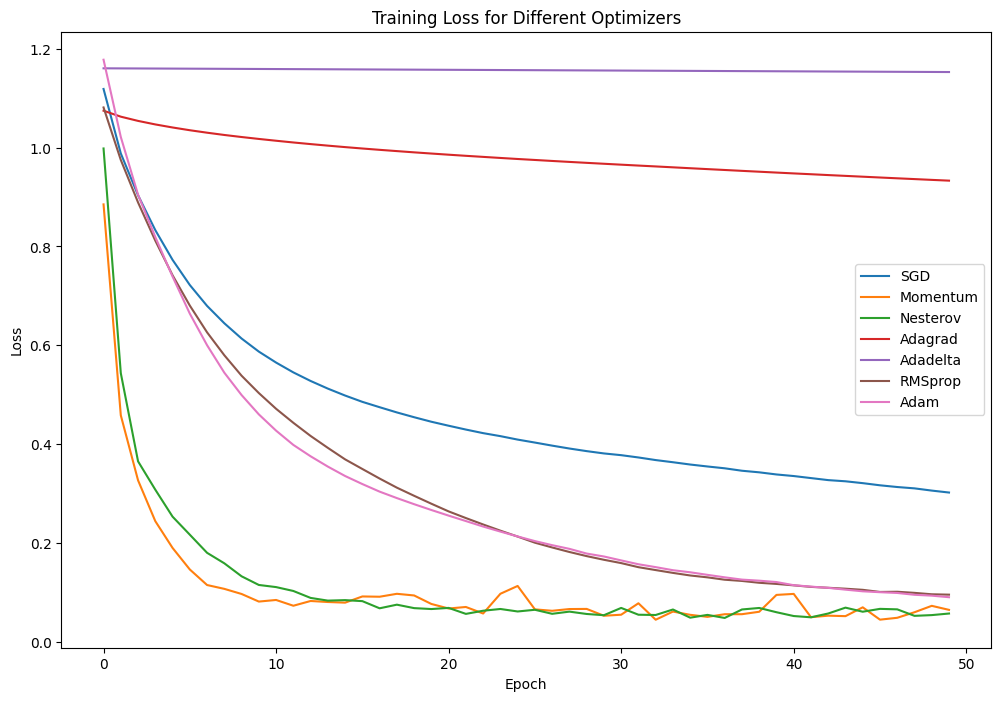

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a function to create a model
def create_model():
    model = Sequential()
    model.add(Dense(10, input_shape=(4,), activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    return model

# Dictionary of optimizers
optimizers = {
    'SGD': SGD(),
    'Momentum': SGD(momentum=0.9),
    'Nesterov': SGD(momentum=0.9, nesterov=True),
    'Adagrad': Adagrad(),
    'Adadelta': Adadelta(),
    'RMSprop': RMSprop(),
    'Adam': Adam()
}

history_dict = {}

# Train the model with each optimizer
for name, optimizer in optimizers.items():
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"Training with {name} optimizer...")
    history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test), verbose=0)
    history_dict[name] = history.history['loss']

# Plot the training loss for each optimizer
plt.figure(figsize=(12, 8))
for name, loss in history_dict.items():
    plt.plot(loss, label=name)

plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
